In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
# import platform
from matplotlib import font_manager, rc

In [2]:
from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/gulim.ttc"
font_path = "c:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [85]:
daegu_cctv = pd.read_csv('./d_CCTV_20200318.csv',  encoding='euc-kr')
daegu_cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,대구광역시청,대구광역시 달성군 구지면 응암리 646,대구광역시 달성군 구지면 응암리 646,교통정보수집,1,200,자동차 진행 방면,NaN,2016-11,053-803-4573,35.647368,128.415547,2020-03-18
1,대구광역시청,대구광역시 달성군 구지면 화산리 704,대구광역시 달성군 구지면 화산리 704,교통정보수집,1,200,자동차 진행 방면,NaN,2016-11,053-803-4573,35.664422,128.399093,2020-03-18
2,대구광역시청,대구광역시 동구 국채보상로 827,대구광역시 동구 신천3동 850-6,교통단속,1,130,버스전용차로 차량 진행방면,NaN,1999-11,053-803-4887,35.868391,128.620699,2020-03-18
3,대구광역시청,대구광역시 동구 국채보상로 827,대구광역시 동구 신천3동 850-6,교통단속,1,130,버스전용차로 차량 진행방면,NaN,1999-11,053-803-4887,35.868391,128.620699,2020-03-18
4,대구광역시청,대구광역시 북구 관문동 618-49,대구광역시 북구 관문동 618-49,교통단속,1,130,버스전용차로 차량 진행방면,NaN,2000-04,053-803-4887,35.902207,128.547110,2020-03-18


In [4]:
daegu_cctv.shape

(308, 13)

In [5]:
daegu_cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관리기관명     308 non-null    object 
 1   소재지도로명주소  308 non-null    object 
 2   소재지지번주소   308 non-null    object 
 3   설치목적구분    308 non-null    object 
 4   카메라대수     308 non-null    int64  
 5   카메라화소수    308 non-null    int64  
 6   촬영방면정보    308 non-null    object 
 7   보관일수      0 non-null      float64
 8   설치년월      308 non-null    object 
 9   관리기관전화번호  308 non-null    object 
 10  위도        308 non-null    float64
 11  경도        308 non-null    float64
 12  데이터기준일자   308 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 31.4+ KB


In [6]:
daegu_cctv.describe()

,카메라대수,카메라화소수,보관일수,위도,경도
count,308.0,308.000000,0.0,308.000000,308.000000
mean,1.0,126.860390,NaN,35.858467,128.587524
std,0.0,67.114249,NaN,0.041613,0.059466
min,1.0,41.000000,NaN,35.647368,128.398886
25%,1.0,41.000000,NaN,35.847526,128.553984
50%,1.0,130.000000,NaN,35.865742,128.590158
75%,1.0,200.000000,NaN,35.877319,128.624370
max,1.0,200.000000,NaN,35.992603,128.730851


In [7]:
daegu_cctv.describe(include = 'object')

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,촬영방면정보,설치년월,관리기관전화번호,데이터기준일자
count,308,308,308,308,308,308,308,308
unique,1,243,244,4,24,52,4,1
top,대구광역시청,대구광역시 동구 신서동 1143,대구광역시 동구 신서동 1143,교통단속,자동차 진행 방면,2009-02,053-803-4887,2020-03-18
freq,308,6,6,145,131,39,145,308


In [8]:
daegu_cctv.head(3)

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,대구광역시청,대구광역시 달성군 구지면 응암리 646,대구광역시 달성군 구지면 응암리 646,교통정보수집,1,200,자동차 진행 방면,NaN,2016-11,053-803-4573,35.647368,128.415547,2020-03-18
1,대구광역시청,대구광역시 달성군 구지면 화산리 704,대구광역시 달성군 구지면 화산리 704,교통정보수집,1,200,자동차 진행 방면,NaN,2016-11,053-803-4573,35.664422,128.399093,2020-03-18
2,대구광역시청,대구광역시 동구 국채보상로 827,대구광역시 동구 신천3동 850-6,교통단속,1,130,버스전용차로 차량 진행방면,NaN,1999-11,053-803-4887,35.868391,128.620699,2020-03-18


In [9]:
daegu_cctv.tail()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
303,대구광역시청,대구광역시 남구 봉덕3동 1277-2,대구광역시 남구 봉덕3동 1277-2,교통정보수집,1,41,자동차 진행 방면,NaN,2011-07,053-803-4573,35.832552,128.597309,2020-03-18
304,대구광역시청,대구광역시 남구 봉덕동 1272-5,대구광역시 남구 봉덕동 1272-5,교통정보수집,1,41,자동차 진행 방면,NaN,2011-07,053-803-4573,35.833217,128.600574,2020-03-18
305,대구광역시청,대구광역시 달서구 송현동 1044-2,대구광역시 달서구 송현동 1044-2,교통정보수집,1,41,자동차 진행 방면,NaN,2011-07,053-803-4573,35.837616,128.557529,2020-03-18
306,대구광역시청,대구광역시 달서구 감산동 440-2,대구광역시 달서구 감산동 440-2,교통정보수집,1,41,자동차 진행 방면,NaN,2011-07,053-803-4573,35.850156,128.537257,2020-03-18
307,대구광역시청,대구광역시 달성군 구지면 응암리 1202-12,대구광역시 달성군 구지면 응암리 1202-12,교통정보수집,1,200,자동차 진행 방면,NaN,2016-09,053-803-4573,35.656490,128.415901,2020-03-18


In [10]:
daegu_cctv['설치목적구분'].value_counts()

교통단속      145
교통정보수집    131
생활방범       20
재난재해       12
Name: 설치목적구분, dtype: int64

In [11]:
np.unique(daegu_cctv['설치목적구분'].to_numpy(), return_counts=True)

(array(['교통단속', '교통정보수집', '생활방범', '재난재해'], dtype=object),
 array([145, 131,  20,  12], dtype=int64))

In [12]:
type(np.unique(daegu_cctv['설치목적구분'].to_numpy()))

numpy.ndarray

In [13]:
daegu_cctv['카메라대수'].value_counts()

1    308
Name: 카메라대수, dtype: int64

In [14]:
daegu_cctv['촬영방면정보'].value_counts()

자동차 진행 방면          131
불법 주정차 예상위치 방면     121
버스전용차로 차량 진행방면      24
하천 수위 방면            12
2.28 주차장 방면          1
광장휴게소 주차장 방면         1
관리사무소 입구 방면          1
시계탑 삼거리 방면           1
두류수영장 뒷편 삼거리 방면      1
친수형 휴게마당 방면          1
다목적 운동장 방면           1
인라인스케이트장 방면          1
성당주차장 방면             1
성당못 방면               1
성당휴게소 사거리 방면         1
부용정 입구 방면            1
야구장입구 삼거리 방면         1
반도지 삼거리 방면           1
체육공원 사거리 방면          1
산마루휴게소 주차장 방면        1
야외음악당옆 인도 방면         1
관광정보센터 주차장 방면        1
두류테니스장 주차장 방면        1
수경지 방면               1
Name: 촬영방면정보, dtype: int64

In [15]:
daegu_cctv['보관일수'].value_counts()

Series([], Name: 보관일수, dtype: int64)

In [16]:
daegu_cctv['보관일수'].isna().sum()

308

In [17]:
daegu_cctv['보관일수'].isna().sum()

308

In [18]:
daegu_cctv.isna().sum()
# daegu_cctv.isnull().sum()

관리기관명         0
소재지도로명주소      0
소재지지번주소       0
설치목적구분        0
카메라대수         0
카메라화소수        0
촬영방면정보        0
보관일수        308
설치년월          0
관리기관전화번호      0
위도            0
경도            0
데이터기준일자       0
dtype: int64

In [19]:
print(daegu_cctv['설치년월'].min())
print(daegu_cctv['설치년월'].max())

1988-08
2090-07


In [20]:
print(daegu_cctv['설치년월'].value_counts().sort_index())

1988-08    15
1989-06     5
1990-07     6
1991-10     7
1994-07     5
1994-09     1
1997-06     1
1998-02     1
1998-06     2
1999-01     1
1999-11     2
2000-04     1
2000-12     6
2002-04    10
2002-11     7
2003-02     3
2004-01     3
2006-02     1
2007-06     5
2007-11     4
2008-04     1
2009-02    39
2010-05     1
2010-12    19
2011-01     6
2011-02     1
2011-07    13
2011-09     1
2011-11     6
2012-12     4
2013-01     6
2013-05     1
2013-08     6
2013-11     2
2014-04     5
2014-06     6
2014-08    18
2014-09     4
2014-12     2
2015-01     6
2015-05     8
2015-09     1
2015-11    20
2016-02     2
2016-05     1
2016-09     1
2016-11     2
2016-12     6
2017-03     2
2017-05    30
2089-06     1
2090-07     1
Name: 설치년월, dtype: int64


In [21]:
daegu_cctv['관리기관전화번호'].value_counts()

053-803-4887    145
053-803-4573    131
053-803-7482     20
053-803-2672     12
Name: 관리기관전화번호, dtype: int64

In [22]:
daegu_cctv['데이터기준일자'].value_counts()

2020-03-18    308
Name: 데이터기준일자, dtype: int64

In [23]:
daegu_cctv[daegu_cctv['설치년월'].isin(['2089-06', '2090-07'])]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
230,대구광역시청,대구광역시 서구 평리동 718-1,대구광역시 서구 평리동 718-1,교통정보수집,1,41,자동차 진행 방면,NaN,2090-07,053-803-4573,35.872292,128.571114,2020-03-18
245,대구광역시청,대구광역시 중구 동산동 312,대구광역시 중구 동산동 312,교통정보수집,1,41,자동차 진행 방면,NaN,2089-06,053-803-4573,35.866438,128.587642,2020-03-18


In [24]:
daegu_cctv.loc[220:250, :]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
220,대구광역시청,대구광역시 북구 복현동 623,대구광역시 북구 복현동 623,교통정보수집,1,41,자동차 진행 방면,NaN,1994-07,053-803-4573,35.897673,128.614996,2020-03-18
221,대구광역시청,대구광역시 동구 효목동 964,대구광역시 동구 효목동 964,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.885569,128.633053,2020-03-18
222,대구광역시청,대구광역시 동구 신암동 368,대구광역시 동구 신암동 368,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.883319,128.623946,2020-03-18
223,대구광역시청,대구광역시 동구 신암동 804-4,대구광역시 동구 신암동 804-4,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.882720,128.613606,2020-03-18
224,대구광역시청,대구광역시 중구 동인동1가 405-1,대구광역시 중구 동인동1가 405-1,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.872562,128.604525,2020-03-18
225,대구광역시청,대구광역시 중구 동인동1가 116-3,대구광역시 중구 동인동1가 116-3,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.873836,128.601333,2020-03-18
226,대구광역시청,대구광역시 중구 태평로 3가 225-1,대구광역시 중구 태평로 3가 225-1,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.876472,128.587980,2020-03-18
227,대구광역시청,대구광역시 중구 수창동 104-7,대구광역시 중구 수창동 104-7,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.877673,128.581502,2020-03-18
228,대구광역시청,대구광역시 서구 비산동 541-25,대구광역시 서구 비산동 541-25,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.879602,128.571338,2020-03-18
229,대구광역시청,대구광역시 서구 평리동 1621-26,대구광역시 서구 평리동 1621-26,교통정보수집,1,41,자동차 진행 방면,NaN,2002-04,053-803-4573,35.870471,128.554923,2020-03-18


In [25]:
daegu_cctv.loc[daegu_cctv['설치년월'] == '2089-06' , '설치년월'] = '1998-06'

In [26]:
daegu_cctv.loc[245:246]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
245,대구광역시청,대구광역시 중구 동산동 312,대구광역시 중구 동산동 312,교통정보수집,1,41,자동차 진행 방면,NaN,1998-06,053-803-4573,35.866438,128.587642,2020-03-18
246,대구광역시청,대구광역시 중구 봉산동 127-1,대구광역시 중구 봉산동 127-1,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.863942,128.599459,2020-03-18


In [27]:
daegu_cctv.loc[daegu_cctv['설치년월'] == '2090-07' , '설치년월'] = '1990-07'

In [28]:
daegu_cctv.loc[230:231]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
230,대구광역시청,대구광역시 서구 평리동 718-1,대구광역시 서구 평리동 718-1,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.872292,128.571114,2020-03-18
231,대구광역시청,대구광역시 수성구 범물동 184,대구광역시 수성구 범물동 184,교통정보수집,1,41,자동차 진행 방면,NaN,2002-04,053-803-4573,35.818903,128.649662,2020-03-18


In [29]:
daegu_cctv['설치년월'].max()

'2017-05'

In [30]:
daegu_cctv.isna().sum()

관리기관명         0
소재지도로명주소      0
소재지지번주소       0
설치목적구분        0
카메라대수         0
카메라화소수        0
촬영방면정보        0
보관일수        308
설치년월          0
관리기관전화번호      0
위도            0
경도            0
데이터기준일자       0
dtype: int64

In [31]:
daegu_cctv.shape

(308, 13)

In [32]:
daegu_cctv.dropna(how='all', inplace=True)

In [33]:
daegu_cctv.shape

(308, 13)

In [34]:
daegu_cctv.columns 

Index(['관리기관명', '소재지도로명주소', '소재지지번주소', '설치목적구분', '카메라대수', '카메라화소수', '촬영방면정보',
       '보관일수', '설치년월', '관리기관전화번호', '위도', '경도', '데이터기준일자'],
      dtype='object')

In [35]:
daegu_cctv = daegu_cctv[['소재지도로명주소', '설치목적구분', '설치년월', '위도', '경도']] 
daegu_cctv.head(3)

,소재지도로명주소,설치목적구분,설치년월,위도,경도
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093
2,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699


In [36]:
# print(daegu_cctv['소재지도로명주소'])
print(daegu_cctv['소재지도로명주소'][0].split())
print(daegu_cctv['소재지도로명주소'][0].split()[1])
print(daegu_cctv['소재지도로명주소'][1].split()[1])
print(daegu_cctv['소재지도로명주소'][2].split()[1])

['대구광역시', '달성군', '구지면', '응암리', '646']
달성군
달성군
동구


In [37]:
for eachAddress in daegu_cctv['소재지도로명주소']:
    print(eachAddress.split()[1])

달성군
달성군
동구
동구
북구
동구
동구
북구
동구
동구
수성구
수성구
달서구
달서구
중구
중구
중구
중구
수성구
수성구
서구
서구
북구
북구
수성구
수성구
중구
중구
중구
중구
중구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
서구
서구
서구
서구
서구
서구
서구
서구
서구
수성구
수성구
수성구
수성구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
중구
중구
중구
중구
중구
중구
중구
중구
중구
중구
중구
중구
서구
서구
남구
남구
남구
달서구
달서구
달서구
달서구
달서구
달서구
중구
중구
동구
동구
수성구
수성구
달서구
달서구
동구
동구
북구
북구
수성구
수성구
달성군
달성군
서구
서구
북구
달서구
수성구
달서구
동구
동구
동구
동구
남구
동구
동구
중구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
서구
서구
서구
남구
남구
북구
북구
북구
수성구
수성구
수성구
달서구
달서구
달서구
달성군
달성군
달성군
달성군
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
북구
달성군
수성구
동구
북구
수성구
북구
동구
남구
남구
수성구
수성구
남구
남구
중구
중구
북구
북구
북구
북구
남구
달서구
달서구
달서구
수성구
수성구
수성구
동구
중구
중구
중구
중구
서구
북구
남구
북구
서구
동구
동구
북구
동구
수성구
달서구
수성구
수성구
달서구
달서구
수성구
달서구
북구
북구
북구
북구
북구
동구
동구
동구
중구
중구
중구
중구
서구
서구
서구
수성구
중구
수성구
중구
중구
중구
남구
남구
중구
남구
수성구
남구
서구
북구
중구
중구
중구
수성구
중구
수성구
동구
달서구
달성군
달서구
북구
동구
달성군
달성군
달성군
달성군
달성군
달성군
달성군
동구
동구
동구
동구
동구
동구
수성구
동구
동구
달성군
청도군
북구
달서구
서구
북구
동구
동구
동구
남구
달성군
달서구
달서구
달서구
달성군
북구
북구
수성구
달서구
서구
동구
북구
달서

In [38]:
[eachAddress.split()[1] for eachAddress in daegu_cctv['소재지도로명주소']]

['달성군',
 '달성군',
 '동구',
 '동구',
 '북구',
 '동구',
 '동구',
 '북구',
 '동구',
 '동구',
 '수성구',
 '수성구',
 '달서구',
 '달서구',
 '중구',
 '중구',
 '중구',
 '중구',
 '수성구',
 '수성구',
 '서구',
 '서구',
 '북구',
 '북구',
 '수성구',
 '수성구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '수성구',
 '수성구',
 '수성구',
 '수성구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '서구',
 '서구',
 '남구',
 '남구',
 '남구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '중구',
 '중구',
 '동구',
 '동구',
 '수성구',
 '수성구',
 '달서구',
 '달서구',
 '동구',
 '동구',
 '북구',
 '북구',
 '수성구',
 '수성구',
 '달성군',
 '달성군',
 '서구',
 '서구',
 '북구',
 '달서구',
 '수성구',
 '달서구',
 '동구',
 '동구',
 '동구',
 '동구',
 '남구',
 '동구',
 '동구',
 '중구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '서구',
 '서구',
 '서구',
 '남구',
 '남구',
 '북구',
 '북구',
 '북구',
 '수

In [39]:
daegu_cctv['구'] = [eachAddress.split()[1] for eachAddress in daegu_cctv['소재지도로명주소']]

In [40]:
daegu_cctv.head(3)

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547,달성군
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093,달성군
2,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699,동구


In [41]:
def get_gu(address):
    return address.split()[1]

In [42]:
daegu_cctv['구'] = daegu_cctv['소재지도로명주소'].apply(get_gu)

In [43]:
daegu_cctv[['소재지도로명주소', '구']]

,소재지도로명주소,구
0,대구광역시 달성군 구지면 응암리 646,달성군
1,대구광역시 달성군 구지면 화산리 704,달성군
2,대구광역시 동구 국채보상로 827,동구
3,대구광역시 동구 국채보상로 827,동구
4,대구광역시 북구 관문동 618-49,북구
...,...,...
303,대구광역시 남구 봉덕3동 1277-2,남구
304,대구광역시 남구 봉덕동 1272-5,남구
305,대구광역시 달서구 송현동 1044-2,달서구
306,대구광역시 달서구 감산동 440-2,달서구


In [44]:
daegu_cctv['구'].value_counts()

동구     64
달서구    63
중구     43
수성구    36
북구     32
서구     26
남구     22
달성군    21
청도군     1
Name: 구, dtype: int64

In [45]:
daegu_cctv[daegu_cctv['구'] == '청도군']
daegu_cctv[daegu_cctv['구'] == '청도군'].index
daegu_cctv[daegu_cctv['구'] == '청도군'].index[0]
daegu_cctv.drop(daegu_cctv[daegu_cctv['구'] == '청도군'].index[0], inplace=True)
daegu_cctv['구'].value_counts()

동구     64
달서구    63
중구     43
수성구    36
북구     32
서구     26
남구     22
달성군    21
Name: 구, dtype: int64

In [46]:
daegu_cctv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   소재지도로명주소  307 non-null    object 
 1   설치목적구분    307 non-null    object 
 2   설치년월      307 non-null    object 
 3   위도        307 non-null    float64
 4   경도        307 non-null    float64
 5   구         307 non-null    object 
dtypes: float64(2), object(4)
memory usage: 16.8+ KB


In [47]:
daegu_cctv.head(2)

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547,달성군
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093,달성군


In [48]:
daegu_cctv['설치년'] = pd.to_datetime(daegu_cctv['설치년월'], format='%Y-%m').dt.year
daegu_cctv['설치월'] = pd.to_datetime(daegu_cctv['설치년월'], format='%Y-%m').dt.month
daegu_cctv.head(3)

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구,설치년,설치월
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547,달성군,2016,11
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093,달성군,2016,11
2,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699,동구,1999,11


In [49]:
# def aaa(x):
#     return 1 if int(x) >= 2016 esle 0

In [50]:
daegu_cctv['최근설치'] = daegu_cctv['설치년'].apply(lambda x : 1 if int(x) >= 2016 else 0)
daegu_cctv.head(3)

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구,설치년,설치월,최근설치
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547,달성군,2016,11,1
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093,달성군,2016,11,1
2,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699,동구,1999,11,0


In [51]:
daegu_cctv['설치목적'] = daegu_cctv['설치목적구분']
daegu_cctv.head(3)

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구,설치년,설치월,최근설치,설치목적
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547,달성군,2016,11,1,교통정보수집
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093,달성군,2016,11,1,교통정보수집
2,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속


In [52]:
daegu_cctv = pd.get_dummies(daegu_cctv, columns=['설치목적구분'])
daegu_cctv.head(3)

,소재지도로명주소,설치년월,위도,경도,구,설치년,설치월,최근설치,설치목적,설치목적구분_교통단속,설치목적구분_교통정보수집,설치목적구분_생활방범,설치목적구분_재난재해
0,대구광역시 달성군 구지면 응암리 646,2016-11,35.647368,128.415547,달성군,2016,11,1,교통정보수집,0,1,0,0
1,대구광역시 달성군 구지면 화산리 704,2016-11,35.664422,128.399093,달성군,2016,11,1,교통정보수집,0,1,0,0
2,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0


In [53]:
daegu_cctv.rename(columns = {'설치목적구분_교통단속':'교통단속', 
                             '설치목적구분_교통정보수집':'교통정보수집',
                             '설치목적구분_생활방범':'생활방범',
                             '설치목적구분_재난재해':'재난재해',
                             }, inplace = True)

In [54]:
daegu_cctv.head(3)

,소재지도로명주소,설치년월,위도,경도,구,설치년,설치월,최근설치,설치목적,교통단속,교통정보수집,생활방범,재난재해
0,대구광역시 달성군 구지면 응암리 646,2016-11,35.647368,128.415547,달성군,2016,11,1,교통정보수집,0,1,0,0
1,대구광역시 달성군 구지면 화산리 704,2016-11,35.664422,128.399093,달성군,2016,11,1,교통정보수집,0,1,0,0
2,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0


In [55]:
s1 = daegu_cctv.groupby('설치년')['설치년'].count()
s1.head(3)

설치년
1988    15
1989     5
1990     7
Name: 설치년, dtype: int64

In [56]:
s1.index

Int64Index([1988, 1989, 1990, 1991, 1994, 1997, 1998, 1999, 2000, 2002, 2003,
            2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017],
           dtype='int64', name='설치년')

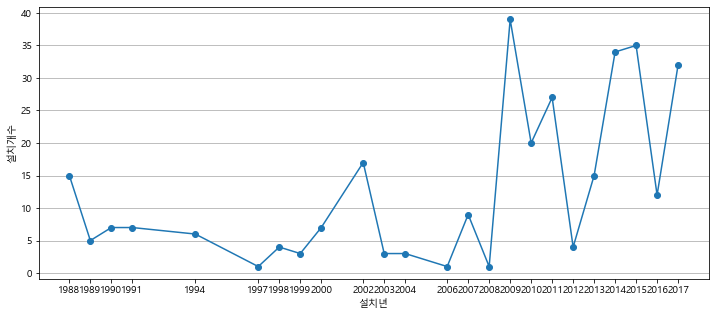

In [57]:
plt.figure(figsize=(12, 5))
plt.plot(s1.index, s1.values, marker='o')
plt.xlabel('설치년')
plt.ylabel('설치개수')
plt.xticks(s1.index)
plt.grid(True, axis='y')
plt.show()

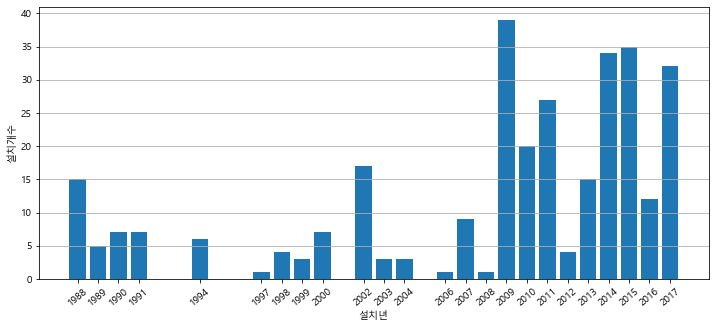

In [58]:
plt.figure(figsize=(12, 5))
plt.bar(s1.index, s1.values)
plt.xlabel('설치년')
plt.ylabel('설치개수')
plt.xticks(s1.index, rotation=40)
plt.grid(True, axis='y')
plt.show()

In [59]:
dc1 = daegu_cctv.groupby(['설치년', '설치목적'])['설치년월'].count().reset_index()
dc1.rename(columns = {'설치년월':'설치개수'}, inplace = True)
dc1.head(3)

,설치년,설치목적,설치개수
0,1988,교통정보수집,15
1,1989,교통정보수집,5
2,1990,교통정보수집,7


In [60]:
dc1['설치목적'].value_counts()

교통정보수집    18
교통단속      15
재난재해       2
생활방범       1
Name: 설치목적, dtype: int64

In [61]:
dc1_1 = dc1[dc1['설치목적'] == '교통정보수집']
dc1_2 = dc1[dc1['설치목적'] == '교통단속']
dc1_3 = dc1[dc1['설치목적'] == '재난재해']
dc1_4 = dc1[dc1['설치목적'] == '생활방범']

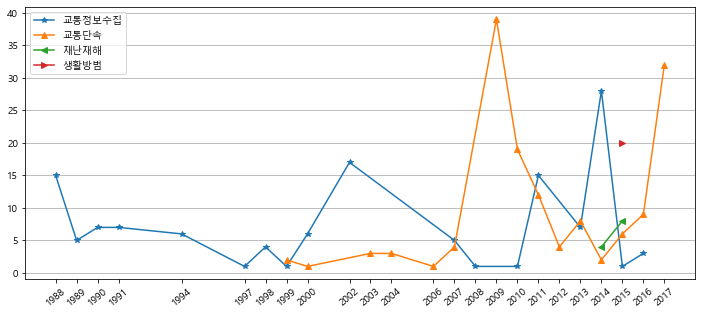

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(dc1_1['설치년'], dc1_1['설치개수'], marker='*', label='교통정보수집')
plt.plot(dc1_2['설치년'], dc1_2['설치개수'], marker='^', label='교통단속')
plt.plot(dc1_3['설치년'], dc1_3['설치개수'], marker='<', label='재난재해')
plt.plot(dc1_4['설치년'], dc1_4['설치개수'], marker='>', label='생활방범')
plt.xticks(s1.index, rotation=40)
plt.legend()
plt.grid(True, axis='y')
plt.show()

In [63]:
dc1_4

,설치년,설치목적,설치개수
31,2015,생활방범,20


In [64]:
daegu_cctv

,소재지도로명주소,설치년월,위도,경도,구,설치년,설치월,최근설치,설치목적,교통단속,교통정보수집,생활방범,재난재해
0,대구광역시 달성군 구지면 응암리 646,2016-11,35.647368,128.415547,달성군,2016,11,1,교통정보수집,0,1,0,0
1,대구광역시 달성군 구지면 화산리 704,2016-11,35.664422,128.399093,달성군,2016,11,1,교통정보수집,0,1,0,0
2,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0
3,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0
4,대구광역시 북구 관문동 618-49,2000-04,35.902207,128.547110,북구,2000,4,0,교통단속,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,대구광역시 남구 봉덕3동 1277-2,2011-07,35.832552,128.597309,남구,2011,7,0,교통정보수집,0,1,0,0
304,대구광역시 남구 봉덕동 1272-5,2011-07,35.833217,128.600574,남구,2011,7,0,교통정보수집,0,1,0,0
305,대구광역시 달서구 송현동 1044-2,2011-07,35.837616,128.557529,달서구,2011,7,0,교통정보수집,0,1,0,0
306,대구광역시 달서구 감산동 440-2,2011-07,35.850156,128.537257,달서구,2011,7,0,교통정보수집,0,1,0,0


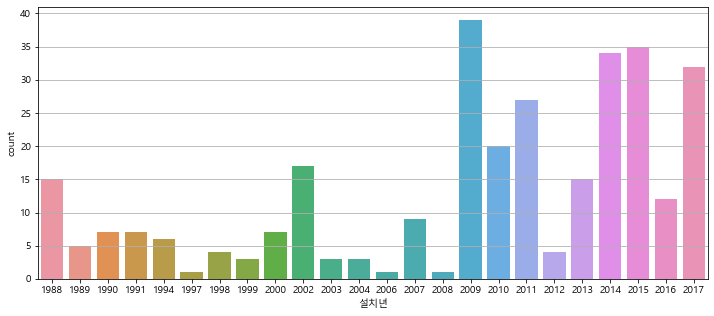

In [65]:
plt.figure(figsize=(12, 5))
sns.countplot(x='설치년', data=daegu_cctv)
plt.grid(True, axis='y')
plt.show()

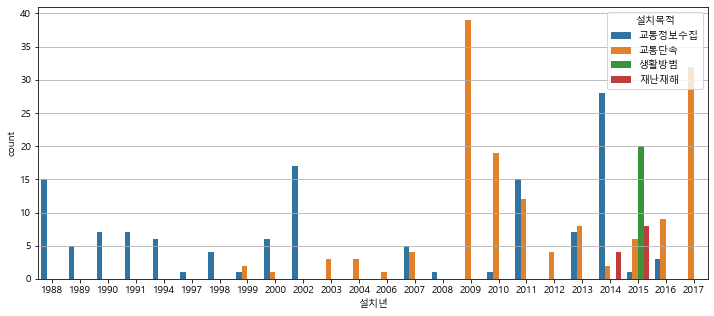

In [66]:
plt.figure(figsize=(12, 5))
sns.countplot(x='설치년', hue='설치목적', data=daegu_cctv)
plt.grid(True, axis='y')
plt.show()

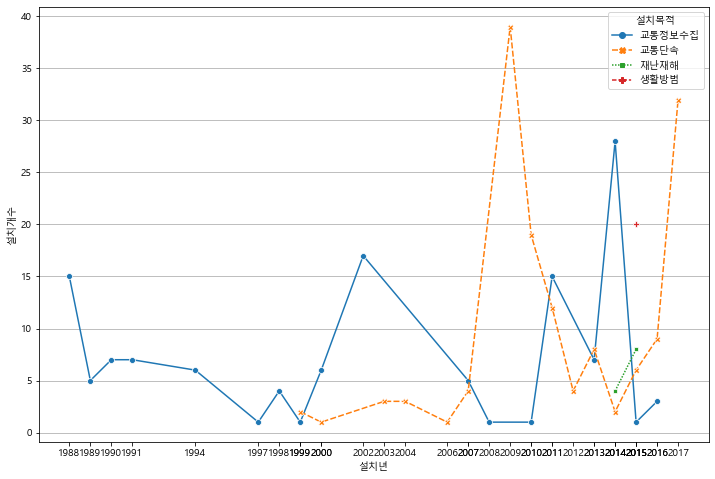

In [67]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='설치년', y='설치개수', hue='설치목적', style='설치목적', markers=True, data=dc1)
plt.xticks(dc1['설치년'].values)
plt.grid(True, axis='y')
plt.show()

- pip install folium

In [68]:
map = folium.Map(location=[35.872149814444164,128.6016540684953], zoom_start=12)

# # 모든 cctv를 지도에 표시
for n in daegu_cctv.index:
    folium.Marker([daegu_cctv.loc[n, '위도'], daegu_cctv.loc[n, '경도']], popup=daegu_cctv.loc[n, '소재지도로명주소'], icon=folium.Icon(color='red',icon='info-sign')).add_to(map)
    
map    

In [69]:
map.save('대구_CCTV_위치.html')

In [70]:
daegu_cctv_gu = daegu_cctv.groupby('구')[['설치년월', '최근설치', '교통단속', '교통정보수집', '생활방범', '재난재해']].agg({
    '설치년월':'count', '최근설치':'sum', '교통단속':'sum', '교통정보수집':'sum', '생활방범':'sum', '재난재해':'sum'})
daegu_cctv_gu.head(2)

,설치년월,최근설치,교통단속,교통정보수집,생활방범,재난재해
구,,,,,,
남구,22,3,6,14,0,2
달서구,63,3,22,21,20,0


In [71]:
daegu_cctv_gu.rename(columns = {'설치년월':'설치개수', '최근설치':'최근설치개수'}, inplace = True)
daegu_cctv_gu.head(3)

,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해
구,,,,,,
남구,22,3,6,14,0,2
달서구,63,3,22,21,20,0
달성군,21,7,6,14,0,1


In [72]:
daegu_cctv_gu['이전설치개수'] = daegu_cctv_gu['설치개수'] - daegu_cctv_gu['최근설치개수']
daegu_cctv_gu.head(3)

,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수
구,,,,,,,
남구,22,3,6,14,0,2,19
달서구,63,3,22,21,20,0,60
달성군,21,7,6,14,0,1,14


In [73]:
daegu_cctv_gu['cctv개수증가율'] = daegu_cctv_gu['최근설치개수'] / daegu_cctv_gu['이전설치개수'] * 100
daegu_cctv_gu[['설치개수', '이전설치개수', '최근설치개수', 'cctv개수증가율']]

,설치개수,이전설치개수,최근설치개수,cctv개수증가율
구,,,,
남구,22,19,3,15.789474
달서구,63,60,3,5.000000
달성군,21,14,7,50.000000
동구,64,45,19,42.222222
북구,32,29,3,10.344828
서구,26,23,3,13.043478
수성구,36,31,5,16.129032
중구,43,42,1,2.380952


In [74]:
s2 = daegu_cctv_gu['설치개수'].sort_values()
s3 = daegu_cctv_gu['최근설치개수'].sort_values()
s4 = daegu_cctv_gu['cctv개수증가율'].sort_values()

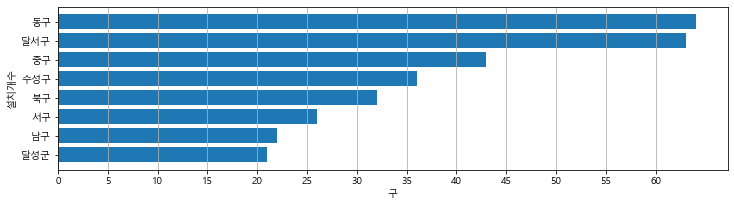

In [75]:
plt.figure(figsize=(12, 3))
plt.barh(s2.index.to_list(), s2.values)
plt.xlabel('구')
plt.ylabel('설치개수')
plt.xticks(np.arange(0, s2.max()+1, 5))
plt.grid(True, axis='x')
plt.show()

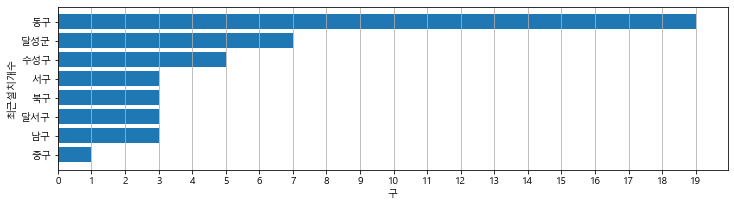

In [76]:
plt.figure(figsize=(12, 3))
plt.barh(s3.index.to_list(), s3.values)
plt.xlabel('구')
plt.ylabel('최근설치개수')
plt.xticks(np.arange(0, s3.max()+1))
plt.grid(True, axis='x')
plt.show()

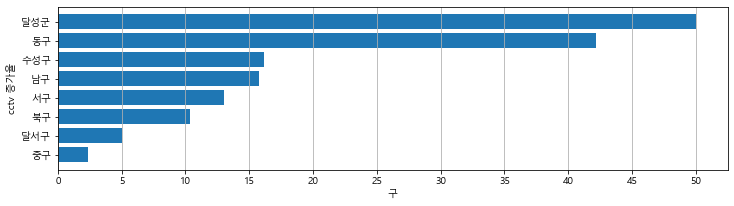

In [77]:
plt.figure(figsize=(12, 3))
plt.barh(s4.index.to_list(), s4.values)
plt.xlabel('구')
plt.ylabel('cctv 증가율')
plt.xticks(np.arange(0, s4.max()+1, 5))
plt.grid(True, axis='x')
plt.show()

In [78]:
daegu_cctv_gu

,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수,cctv개수증가율
구,,,,,,,,
남구,22,3,6,14,0,2,19,15.789474
달서구,63,3,22,21,20,0,60,5.000000
달성군,21,7,6,14,0,1,14,50.000000
동구,64,19,41,21,0,2,45,42.222222
북구,32,3,10,19,0,3,29,10.344828
서구,26,3,18,8,0,0,23,13.043478
수성구,36,5,18,14,0,4,31,16.129032
중구,43,1,24,19,0,0,42,2.380952


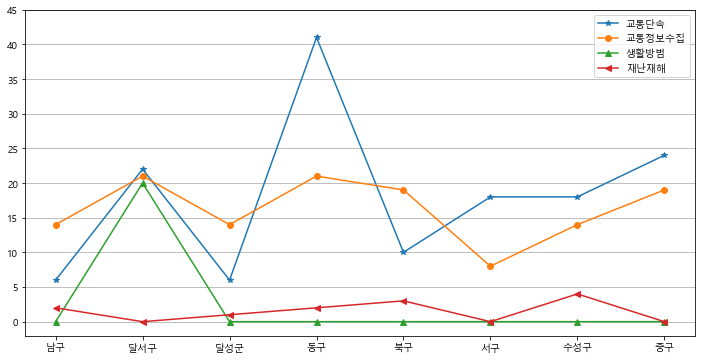

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(daegu_cctv_gu.index, daegu_cctv_gu['교통단속'], marker='*')
plt.plot(daegu_cctv_gu.index, daegu_cctv_gu['교통정보수집'], marker='o')
plt.plot(daegu_cctv_gu.index, daegu_cctv_gu['생활방범'], marker='^')
plt.plot(daegu_cctv_gu.index, daegu_cctv_gu['재난재해'], marker='<')
plt.yticks(np.arange(0, 50, 5))
plt.grid(True, axis='y')
plt.legend(['교통단속', '교통정보수집', '생활방범', '재난재해'])
plt.show()

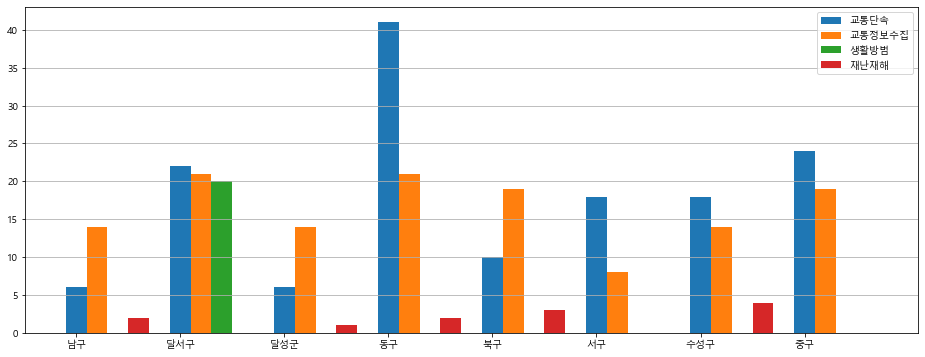

In [80]:
x_index = np.arange(0, len(daegu_cctv_gu.index))
bar_width = 0.2

plt.figure(figsize=(16, 6))
plt.bar(x_index, daegu_cctv_gu['교통단속'], bar_width)
plt.bar(x_index + bar_width, daegu_cctv_gu['교통정보수집'], bar_width)
plt.bar(x_index + (bar_width * 2), daegu_cctv_gu['생활방범'], bar_width)
plt.bar(x_index + (bar_width * 3), daegu_cctv_gu['재난재해'], bar_width)
plt.xticks(x_index, daegu_cctv_gu.index)
plt.yticks(np.arange(0, 45, 5))
plt.grid(True, axis='y')
plt.legend(['교통단속', '교통정보수집', '생활방범', '재난재해'])
plt.show()

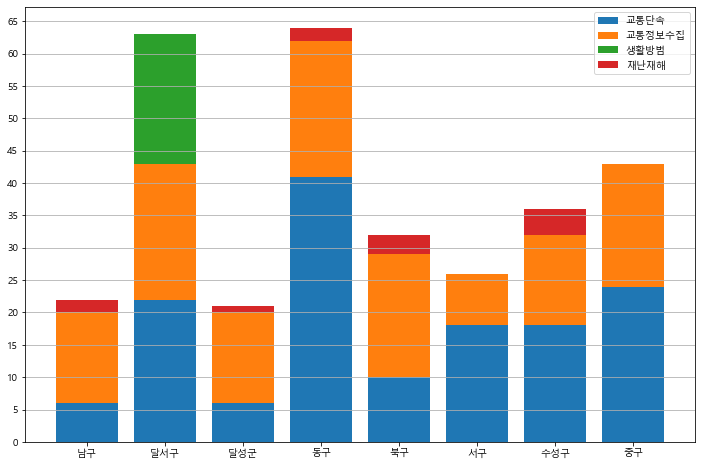

In [81]:
plt.figure(figsize=(12, 8))
plt.bar(daegu_cctv_gu.index, daegu_cctv_gu['교통단속'])
plt.bar(daegu_cctv_gu.index, daegu_cctv_gu['교통정보수집'], bottom=daegu_cctv_gu['교통단속'])
plt.bar(daegu_cctv_gu.index, daegu_cctv_gu['생활방범'], bottom=daegu_cctv_gu['교통단속'] + daegu_cctv_gu['교통정보수집'])
plt.bar(daegu_cctv_gu.index, daegu_cctv_gu['재난재해'], bottom=daegu_cctv_gu['교통단속'] + daegu_cctv_gu['교통정보수집'] + daegu_cctv_gu['생활방범'])
plt.yticks(np.arange(0, 70, 5))
plt.grid(True, axis='y')
plt.legend(['교통단속', '교통정보수집', '생활방범', '재난재해'])
plt.show()

In [90]:
daegu_people = pd.read_csv('./d_people_2011_20191106125138_utf8.csv')
daegu_people

,행정구역(동읍면)별,항목,2011,2012,2013,2014,2015,2016,2017,2018
0,행정구역(동읍면)별,항목,계,계,계,계,계,계,계,계
1,대구광역시,총인구수 (명),2507271,2505644,2501588,2493264,2487829,2484557,2475231,2461769
2,대구광역시,남자인구수 (명),1251577,1249320,1246071,1241119,1237291,1234169,1227814,1219342
3,대구광역시,여자인구수 (명),1255694,1256324,1255517,1252145,1250538,1250388,1247417,1242427
4,중구,총인구수 (명),76600,75439,76246,78812,80928,79712,78986,79401
5,중구,남자인구수 (명),37616,36980,37276,38444,39492,38720,38395,38498
6,중구,여자인구수 (명),38984,38459,38970,40368,41436,40992,40591,40903
7,동구,총인구수 (명),341206,342092,343802,347975,349728,351352,349379,351291
8,동구,남자인구수 (명),170918,171161,171738,173633,174224,174663,173301,173955
9,동구,여자인구수 (명),170288,170931,172064,174342,175504,176689,176078,177336


In [91]:
daegu_people.shape

(28, 10)

In [92]:
daegu_people = daegu_people.loc[3:]
daegu_people.head()

,행정구역(동읍면)별,항목,2011,2012,2013,2014,2015,2016,2017,2018
3,대구광역시,여자인구수 (명),1255694,1256324,1255517,1252145,1250538,1250388,1247417,1242427
4,중구,총인구수 (명),76600,75439,76246,78812,80928,79712,78986,79401
5,중구,남자인구수 (명),37616,36980,37276,38444,39492,38720,38395,38498
6,중구,여자인구수 (명),38984,38459,38970,40368,41436,40992,40591,40903
7,동구,총인구수 (명),341206,342092,343802,347975,349728,351352,349379,351291


In [93]:
daegu_people['항목'] != '계'

3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
Name: 항목, dtype: bool

In [94]:
daegu_people = daegu_people[daegu_people['항목'] != '계']
daegu_people.head()

,행정구역(동읍면)별,항목,2011,2012,2013,2014,2015,2016,2017,2018
3,대구광역시,여자인구수 (명),1255694,1256324,1255517,1252145,1250538,1250388,1247417,1242427
4,중구,총인구수 (명),76600,75439,76246,78812,80928,79712,78986,79401
5,중구,남자인구수 (명),37616,36980,37276,38444,39492,38720,38395,38498
6,중구,여자인구수 (명),38984,38459,38970,40368,41436,40992,40591,40903
7,동구,총인구수 (명),341206,342092,343802,347975,349728,351352,349379,351291


In [120]:
daegu_people.rename(columns = {'연령별(1)':'구분', 
                             '행정구역(동읍면)별(1)':'구',
                             '항목':'성별'}, inplace = True)
daegu_people.head(3)

,행정구역(동읍면)별,성별,2011,2012,2013,2014,2015,2016,2017,2018
3,대구광역시,여자인구수 (명),1255694,1256324,1255517,1252145,1250538,1250388,1247417,1242427
4,중구,총인구수 (명),76600,75439,76246,78812,80928,79712,78986,79401
5,중구,남자인구수 (명),37616,36980,37276,38444,39492,38720,38395,38498


In [119]:
dpa = daegu_people.groupby('구분')[['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].sum()
dpa

KeyError: '구분'

In [97]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=dpa.columns, y=dpa.iloc[0], marker='o')
plt.grid(True, axis='y')
plt.show()

NameError: name 'dpa' is not defined

<Figure size 864x432 with 0 Axes>

In [98]:
dps = daegu_people.groupby('성별')[['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].sum()
dps

KeyError: "Columns not found: '2019'"

In [99]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=dps.columns, y=dps.iloc[0], marker='o')
sns.lineplot(x=dps.columns, y=dps.iloc[1], marker='^')
plt.grid(True, axis='y')
plt.legend(['남자', '여자'])
plt.show()

NameError: name 'dps' is not defined

<Figure size 864x432 with 0 Axes>

In [100]:
daegu_people.shape

(25, 10)

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(x='구', y='2019', hue='성별', data=daegu_people)
plt.grid(True, axis='y')
plt.show()

ValueError: Could not interpret input '구'

<Figure size 864x432 with 0 Axes>

In [102]:
daegu_people

,행정구역(동읍면)별,성별,2011,2012,2013,2014,2015,2016,2017,2018
3,대구광역시,여자인구수 (명),1255694,1256324,1255517,1252145,1250538,1250388,1247417,1242427
4,중구,총인구수 (명),76600,75439,76246,78812,80928,79712,78986,79401
5,중구,남자인구수 (명),37616,36980,37276,38444,39492,38720,38395,38498
6,중구,여자인구수 (명),38984,38459,38970,40368,41436,40992,40591,40903
7,동구,총인구수 (명),341206,342092,343802,347975,349728,351352,349379,351291
8,동구,남자인구수 (명),170918,171161,171738,173633,174224,174663,173301,173955
9,동구,여자인구수 (명),170288,170931,172064,174342,175504,176689,176078,177336
10,서구,총인구수 (명),222619,220211,215399,210770,206028,199507,191992,184372
11,서구,남자인구수 (명),113135,111782,109196,106740,104213,100760,96795,92796
12,서구,여자인구수 (명),109484,108429,106203,104030,101815,98747,95197,91576


In [103]:
dpm = daegu_people.loc[daegu_people['성별'] == '남자', ['구', '2015', '2019']]
dpw = daegu_people.loc[daegu_people['성별'] == '여자', ['구', '2015', '2019']]
dpm.columns = ['구', '2015_남', '2019_남']
dpw.columns = ['구', '2015_여', '2019_여']
print(dpm.head(3))
print('--------------------')
print(dpw.head(3))

KeyError: "['구', '2019'] not in index"

In [104]:
daegu_cctv_gu = pd.merge(daegu_cctv_gu, dpm, on='구', how='left')
daegu_cctv_gu = pd.merge(daegu_cctv_gu, dpw, on='구', how='left')
daegu_cctv_gu

NameError: name 'dpm' is not defined

In [105]:
daegu_cctv_gu

,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수,cctv개수증가율
구,,,,,,,,
남구,22,3,6,14,0,2,19,15.789474
달서구,63,3,22,21,20,0,60,5.000000
달성군,21,7,6,14,0,1,14,50.000000
동구,64,19,41,21,0,2,45,42.222222
북구,32,3,10,19,0,3,29,10.344828
서구,26,3,18,8,0,0,23,13.043478
수성구,36,5,18,14,0,4,31,16.129032
중구,43,1,24,19,0,0,42,2.380952


In [106]:
daegu_cctv_gu['2015_총'] = daegu_cctv_gu['2015_남'] + daegu_cctv_gu['2015_여']
daegu_cctv_gu['2019_총'] = daegu_cctv_gu['2019_남'] + daegu_cctv_gu['2019_여']
daegu_cctv_gu.head(3)

KeyError: '2015_남'

In [107]:
daegu_cctv_gu['인구증가수_남'] = daegu_cctv_gu['2019_남'] - daegu_cctv_gu['2015_남']
daegu_cctv_gu['인구증가수_여'] = daegu_cctv_gu['2019_여'] - daegu_cctv_gu['2015_여']
daegu_cctv_gu['인구증가수_총'] = daegu_cctv_gu['2019_총'] - daegu_cctv_gu['2015_총']
daegu_cctv_gu

KeyError: '2019_남'

In [108]:
daegu_cctv_gu.set_index('구', inplace=True)
daegu_cctv_gu.head(3)

KeyError: "None of ['구'] are in the columns"

In [109]:
daegu_cctv_gu.drop('교통단속', axis=1, inplace=True)
daegu_cctv_gu.drop('교통정보수집', axis=1, inplace=True)
daegu_cctv_gu.drop('생활방범', axis=1, inplace=True)
daegu_cctv_gu.drop('재난재해', axis=1, inplace=True)
daegu_cctv_gu.drop('2015_남', axis=1, inplace=True)
daegu_cctv_gu.drop('2015_여', axis=1, inplace=True)
daegu_cctv_gu.drop('2015_총', axis=1, inplace=True)
daegu_cctv_gu.head(3)

KeyError: "['2015_남'] not found in axis"

In [110]:
daegu_cctv_gu.rename(columns = {'2019_남' : '인구수_남'}, inplace=True)
daegu_cctv_gu.rename(columns = {'2019_여' : '인구수_여'}, inplace=True)
daegu_cctv_gu.rename(columns = {'2019_총' : '인구수_총'}, inplace=True)
daegu_cctv_gu.head(3)

,설치개수,최근설치개수,이전설치개수,cctv개수증가율
구,,,,
남구,22,3,19,15.789474
달서구,63,3,60,5.000000
달성군,21,7,14,50.000000


In [111]:
daegu_cctv_gu.shape

(8, 4)

In [112]:
daegu_cctv_gu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 남구 to 중구
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   설치개수       8 non-null      int64  
 1   최근설치개수     8 non-null      int64  
 2   이전설치개수     8 non-null      int64  
 3   cctv개수증가율  8 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 320.0+ bytes


In [113]:
daegu_cctv_gu.describe()

,설치개수,최근설치개수,이전설치개수,cctv개수증가율
count,8.000000,8.000000,8.000000,8.000000
mean,38.375000,5.500000,32.875000,19.363748
std,17.129236,5.732115,15.263753,17.321943
min,21.000000,1.000000,14.000000,2.380952
25%,25.000000,3.000000,22.000000,9.008621
50%,34.000000,3.000000,30.000000,14.416476
75%,48.000000,5.500000,42.750000,22.652330
max,64.000000,19.000000,60.000000,50.000000


In [114]:
# 전체 cctv 개당 인구수
daegu_cctv_gu['인구수_총'].sum() / daegu_cctv_gu['설치개수'].sum()

KeyError: '인구수_총'

In [115]:
daegu_cctv_gu['인구수_총'] / daegu_cctv_gu['설치개수']

KeyError: '인구수_총'

In [116]:
(daegu_cctv_gu['인구수_총'] / daegu_cctv_gu['설치개수']).plot(kind='barh')

KeyError: '인구수_총'

In [117]:
(daegu_cctv_gu['인구수_총'] / daegu_cctv_gu['설치개수']).sort_values(ascending=False).plot(kind='barh')

KeyError: '인구수_총'

In [118]:
plt.figure(figsize=(12, 3))
(daegu_cctv_gu['인구수_총'] / daegu_cctv_gu['설치개수']).sort_values(ascending=False).plot(kind='barh')
plt.grid(True, axis='x')
plt.show()

KeyError: '인구수_총'

<Figure size 864x216 with 0 Axes>

In [ ]:
dcg_s1 = daegu_cctv_gu['최근설치개수'].sort_values(ascending=False)
# 시각화
sns.barplot(x=dcg_s1.index,    # '구',
            y=dcg_s1.values,     # '최근증가수'
            palette='gist_rainbow_r')

In [ ]:
# 인구증가수_총'로 정렬(내림차순)하여 보기 
dcg_s2 = daegu_cctv_gu['인구증가수_총'].sort_values(ascending=False)
# 시각화
sns.barplot(x=dcg_s2.index.tolist(),    # '구',
            y=dcg_s2.values.tolist(),     # '인구증가율_수''
            palette='viridis_r')
plt.show()

In [ ]:
plt.rc('axes', unicode_minus=False)

In [ ]:
dcg_s5 = daegu_cctv_gu['인구증가수_총'].sort_values(ascending=False)
# 시각화
sns.barplot(x=dcg_s5.index.tolist(),    # '구',
            y=dcg_s5.values.tolist(),     # '인구증가율_수''
            palette='viridis_r')
plt.show()

In [ ]:
dcg_s5 = daegu_cctv_gu['인구증가수_총'].sort_values(ascending=False)
# 시각화
plt.figure(figsize=(6, 5))
sns.barplot(x=dcg_s5.index.tolist(),    # '구',
            y=dcg_s5.values.tolist(),     # '인구증가율_수''
            palette='viridis_r')
plt.grid(True, axis='y')
plt.show()

In [ ]:
daegu_cctv_gu.columns

In [ ]:
daegu_cctv_gu[col_list].corr()

In [ ]:
col_list = ['설치개수', '최근설치개수', '인구수_총', '인구증가수_총', '인구증가수_여']
plt.figure(figsize=(10, 8))
sns.heatmap(daegu_cctv_gu[col_list].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
sns.pairplot(daegu_cctv_gu[col_list])
plt.show()

In [ ]:
daegu_cctv_gu.columns

In [ ]:
plt.scatter(daegu_cctv_gu['인구수_총'], daegu_cctv_gu['설치개수'])
plt.xlabel('인구수_총')
plt.ylabel('설치개수')
plt.grid()
plt.show()

In [ ]:
fp1 = np.polyfit(daegu_cctv_gu['인구수_총'], daegu_cctv_gu['설치개수'], 1)
fp1

In [ ]:
### poly1d => 함수로 만들어 줌 ###
# fp1[0] * 1 + fp1[1]
f1 = np.poly1d(fp1)

# 5.18623749e-05 * 1 + 2.25697403e+01
print(f1(1))
# 5.18623749e-05 * 2 + 2.25697403e+01
print(f1(2))
# 1, 2
print(f1([1, 2]))

In [ ]:
### linspace Test ###
# 시작값, 끝값, 몇 개의 요소를 만들지
print(np.linspace(0, 10, 1))
print(np.linspace(0, 10, 2))
print(np.linspace(0, 10, 11))
# print(np.linspace(100000, 600000, 100))

In [ ]:
fx = np.linspace(50000, 600000, 100)
# fx = np.linspace(np.min(daegu_cctv_gu['인구수_총']), np.max(daegu_cctv_gu['인구수_여']), 100)

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(daegu_cctv_gu['인구수_총'], daegu_cctv_gu['설치개수'], s=50)
# plt.plot(fx, f1(fx), ls='dashed', lw=2, color='r')
plt.plot(fx, f1(fx), 'r--')

for n in range(daegu_cctv_gu['인구수_총'].shape[0]):
    plt.text(daegu_cctv_gu['인구수_총'][n]+4500, daegu_cctv_gu['설치개수'][n], daegu_cctv_gu.index[n], fontsize=12)

plt.xlabel('인구수_총')
plt.ylabel('설치개수')
# plt.colorbar()
plt.grid()
plt.show()

In [ ]:
sns.lmplot(x = '인구수_총',
           y = '설치개수',
           data = daegu_cctv_gu)
plt.show()

In [ ]:
plt.scatter(daegu_cctv_gu['인구수_여'], daegu_cctv_gu['설치개수'], s=50)
plt.xlabel('인구수_여')
plt.ylabel('설치개수')
plt.grid()
plt.show()

In [ ]:
fp1 = np.polyfit(daegu_cctv_gu['인구수_여'], daegu_cctv_gu['설치개수'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000, 350000, 100)
# fx = np.linspace(np.min(daegu_cctv_gu['인구수_여']), np.max(daegu_cctv_gu['인구수_여']), 100)

plt.figure(figsize=(10,7))
plt.scatter(daegu_cctv_gu['인구수_여'], daegu_cctv_gu['설치개수'], s=50)
# plt.plot(fx, f1(fx), ls='dashed', lw=2, color='r')
plt.plot(fx, f1(fx), 'r--')

for n in range(daegu_cctv_gu['인구수_여'].shape[0]):
    plt.text(daegu_cctv_gu['인구수_여'][n]+4500, daegu_cctv_gu['설치개수'][n], daegu_cctv_gu.index[n], fontsize=12)

plt.xlabel('인구수_여')
plt.ylabel('설치개수')
# plt.colorbar()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.lmplot(x = '인구수_여',
           y = '설치개수',
           data = daegu_cctv_gu)
plt.show()

In [ ]:
sns.lmplot(x = '인구증가수_여',
           y = '최근설치개수',
           data = daegu_cctv_gu)
plt.show()

In [ ]:
daegu_cctv_gu.boxplot(column='설치개수'  )

In [ ]:
daegu_cctv_gu.boxplot(column=['인구수_남', '인구수_여'] )

In [ ]:
sns.boxplot(y="최근설치개수", data=daegu_cctv_gu, palette="Set3")

In [ ]:
sns.boxplot(y="설치개수", data=daegu_cctv_gu, palette="Set3")

In [ ]:
# 각 구청의 위도 정보를 Series로 생성
se_x = pd.Series([35.869478,35.872019, 35.846242, 35.85803,35.885644 ,35.886584 ,35.830182 ,35.774859 ],
               index=["중구", "서구", "남구", "수성구", "북구","동구", "달서구", "달성군"], name="위도")

# 각 구청의 경도 정보를 Series로 생성
se_y = pd.Series([128.6039893,128.5569713, 128.5955493, 128.6284373,128.5809731 ,128.6333593 ,128.5307293 ,128.4295003 ],
               index=["중구", "서구", "남구", "수성구", "북구","동구", "달서구", "달성군"], name="경도")

# 구청의 위/경도 정보를 합치기
daegu_cctv_gu = pd.concat([daegu_cctv_gu, se_x], axis=1)
daegu_cctv_gu = pd.concat([daegu_cctv_gu, se_y], axis=1)
daegu_cctv_gu

In [ ]:
daegu_cctv_gu = daegu_cctv_gu.reset_index()

In [ ]:
daegu_cctv_gu.rename(columns = {'index':'구'}, inplace = True)

In [ ]:
daegu_cctv_gu.head(3)

In [ ]:
# 대구시청을 중심으로 지도 표현
map2 = folium.Map(location=[35.8724,128.5995983], zoom_start=13, tiles='Stamen Toner')

# 모든 cctv를 지도에 표시
for n in daegu_cctv_gu.index:
    folium.Marker([daegu_cctv_gu['위도'][n],daegu_cctv_gu['경도'][n]], popup="{} : {}".format(daegu_cctv_gu['구'][n], daegu_cctv_gu['설치개수'][n]), icon=folium.Icon(color='green',icon='info-sign')).add_to(map2)

map2

In [ ]:
map3 = folium.Map(location=[35.8724,128.5995983], zoom_start=13, tiles='Stamen Toner')

# 모든 cctv를 지도에 표시
for n in daegu_cctv_gu.index:
    folium.Marker([daegu_cctv_gu['위도'][n],daegu_cctv_gu['경도'][n]], popup="{} : {}".format(n, daegu_cctv_gu['설치개수'][n]), icon=folium.Icon(color='green',icon='info-sign')).add_to(map3)
    folium.CircleMarker([daegu_cctv_gu['위도'][n],daegu_cctv_gu['경도'][n]], radius=int(daegu_cctv_gu['설치개수'][n]), 
                        tooltip='{} : {}'.format(daegu_cctv_gu['구'][n], daegu_cctv_gu['설치개수'][n]), color='#258643', fill_color='#258643', ).add_to(map3)

map3